C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

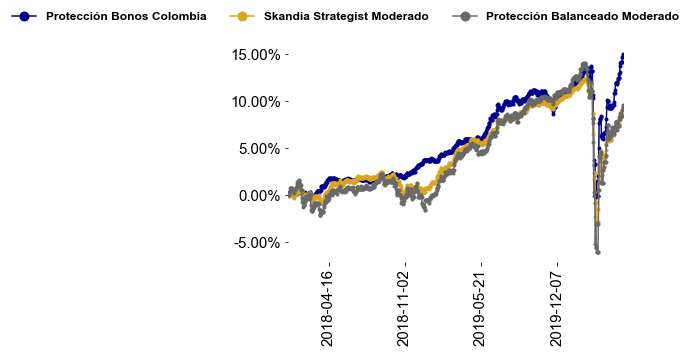

Bonos Colombia = [0.14688586]
Strategist Moderado Skandia = [0.09166046]
Moderado Protección = [0.09400823]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager


df = pd.read_csv('D:/andrgome/Documents/BDPython/BD_PENSIONESVOL.csv',encoding='latin-1')

# #Apliquemos filtros
df1 = df[df['Nombre_Patrimonio'].isin(['BONOS COLOMBIA'])]   #Filtro 1
df1['Fecha'] = pd.to_datetime(df1['Fecha'])
df1.set_index('Fecha', inplace=True)
df1.sort_values(by=['Fecha'],inplace=True)
df1 = df1.loc['2017-12-31':'2020-05-28']
df1['Valor Unidad'] = df1['Valor Unidad'].astype(float) #Convertir a float la columna tasa

df1['retorno_diario'] = df1['Valor Unidad'][1:].values/df1['Valor Unidad'][:-1]-1
df1['retorno_acumulado']=(1 + df1['retorno_diario']).cumprod() - 1
df1['retorno_acumulado'][1:]=df1['retorno_acumulado'][:-1]
df1.iloc[0,6]=0

df2 = df[df['Nombre_Patrimonio'].isin(['PV STRATEGIST MODERADO COLOMBIA'])]   #Filtro 1
df2['Fecha'] = pd.to_datetime(df2['Fecha'])
df2.set_index('Fecha', inplace=True)
df2.sort_values(by=['Fecha'],inplace=True)
df2 = df2.loc['2017-12-31':'2020-05-28']
df2['Valor Unidad'] = df2['Valor Unidad'].astype(float) #Convertir a float la columna tasa

df2['retorno_diario'] = df2['Valor Unidad'][1:].values/df2['Valor Unidad'][:-1]-1
df2['retorno_acumulado']=(1 + df2['retorno_diario']).cumprod() - 1
df2['retorno_acumulado'][1:]=df2['retorno_acumulado'][:-1]
df2.iloc[0,6]=0


df3 = df[df['Nombre_Patrimonio'].isin(['PROTECCION BALANCEADO MODERADO'])]   #Filtro 1
df3['Fecha'] = pd.to_datetime(df3['Fecha'])
df3.set_index('Fecha', inplace=True)
df3.sort_values(by=['Fecha'],inplace=True)
df3 = df3.loc['2017-12-31':'2020-05-28']
df3['Valor Unidad'] = df3['Valor Unidad'].astype(float) #Convertir a float la columna tasa

df3['retorno_diario'] = df3['Valor Unidad'][1:].values/df3['Valor Unidad'][:-1]-1
df3['retorno_acumulado']=(1 + df3['retorno_diario']).cumprod() - 1
df3['retorno_acumulado'][1:]=df3['retorno_acumulado'][:-1]
df3.iloc[0,6]=0



tick_spacing = 200
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=12)

# #Gráfico
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(df1.index,df1['retorno_acumulado'],marker='o', linestyle='solid',color='darkblue',alpha = 0.99,label='Protección Bonos Colombia',markersize=3)
ax.plot(df2.index,df2['retorno_acumulado'],marker='o', linestyle='solid',color='goldenrod',alpha = 0.99,label='Skandia Strategist Moderado',markersize=3)
ax.plot(df3.index,df3['retorno_acumulado'],marker='o', linestyle='solid',color='dimgrey',alpha = 0.99,label='Protección Balanceado Moderado',markersize=3)
#ax.plot(df_porv.index,df_porv['retorno_acumulado'],marker='o', linestyle='solid',color='gold',alpha = 0.99,label='Porvenir',markersize=3)
#ax.plot(df_skandia.index,df_skandia['retorno_acumulado'],marker='o', linestyle='solid',color='dimgrey',alpha = 0.99,label='Skandia',markersize=3)
#ax.plot(df_colfondos.index,df_colfondos['retorno_acumulado'],marker='o', linestyle='solid',color='plum',alpha = 0.99,label='Colfondos',markersize=3)
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.2, 1.2),ncol=10,markerscale=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)
#ax.title.set_text("Fondos de Pensiones Obligatorias Moderados")
ax.title.set_fontfamily('arial')
plt.axis(['2017-12-31', '2020-05-28', None, None])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.box(on=None)
plt.show()

print('Bonos Colombia =',df1[['retorno_acumulado']].iloc[-1].values)
print('Strategist Moderado Skandia =',df2[['retorno_acumulado']].iloc[-1].values)
print('Moderado Protección =',df3[['retorno_acumulado']].iloc[-1].values)
#print('Porvenir =',df_porv[['retorno_acumulado']].iloc[-1].values)
#print('Skandia =',df_skandia[['retorno_acumulado']].iloc[-1].values)
#print('Protección =',df_prot[['retorno_acumulado']].iloc[-1].values)